In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
import scipy

In [2]:
data = pd.ExcelFile('C:/Users/devdi/Desktop/CMU/Final Mini/Python for Data Science/Project/Data_cosol.xlsx')

In [3]:
ta = data.parse('TripAdvisorClean')
zomato = data.parse('ZomatoClean')
yelp = data.parse('YelpClean')

In [4]:
ta.head()

ta.shape

(1248, 7)

In [5]:
zomato.head(5)

zomato.shape

(100, 7)

In [6]:
yelp.head(5)

yelp.shape

(1000, 7)

In [7]:
yelp.columns

Index(['category', 'name', 'price', 'rating', 'review_count', 'url', 'zip'], dtype='object')

In [8]:
zomato.columns = ['address', 'rating', 'rating Text', 'name', 'url', 'votes','source']

In [9]:
ta.columns = ['restaurantID', 'restaurantURL', 'name', 'address', 'ranking',
       'total review', 'source']

## Cross tabulation charts

### Yelp Restaurant Category and Rating

## Zomato Rating

In [10]:
bins = [0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4.0, 4.5, 5.0]

zomato['ratingbucket'] = pd.cut(zomato['rating'], bins)

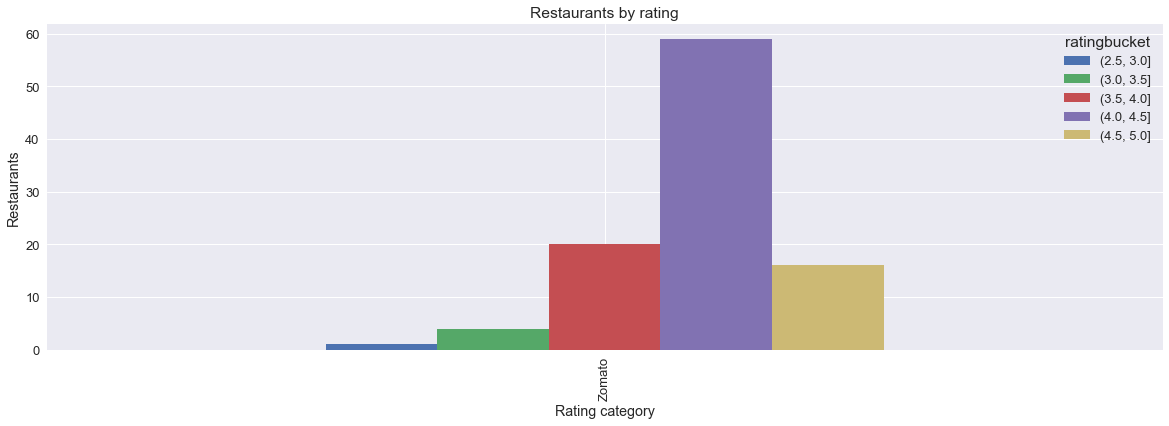

In [11]:
zomato = zomato.sort_values('rating', ascending=False)

sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(20,6))
pd.crosstab(zomato.source,zomato.ratingbucket).head(20).plot(ax=ax, kind='bar')
plt.title('Restaurants by rating')
plt.xlabel('Rating category')
plt.ylabel('Restaurants')
plt.show()

## Yelp Rating

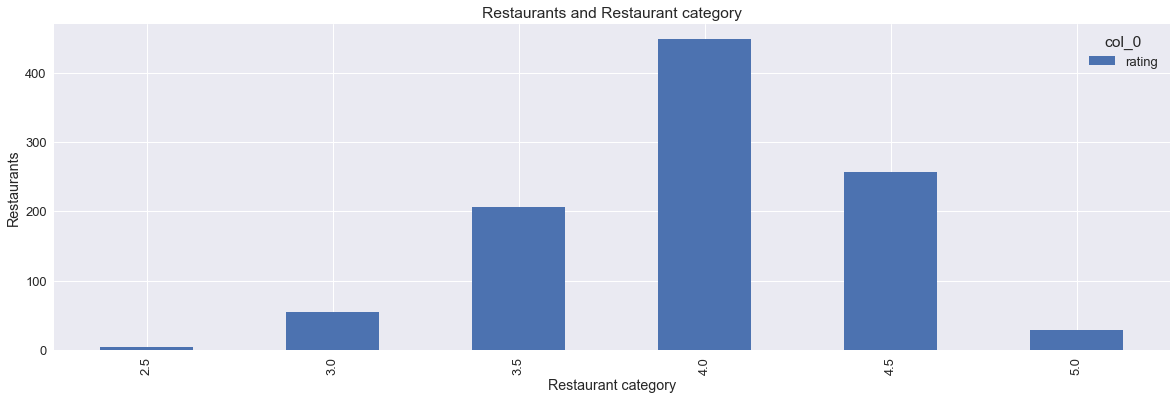

In [12]:
yelp = yelp.sort_values('rating', ascending=False)

sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(20,6))
pd.crosstab(yelp.rating,yelp.rating.name).head(20).plot(ax=ax, kind='bar')
plt.title('Restaurants and Restaurant category')
plt.xlabel('Restaurant category')
plt.ylabel('Restaurants')
plt.show()

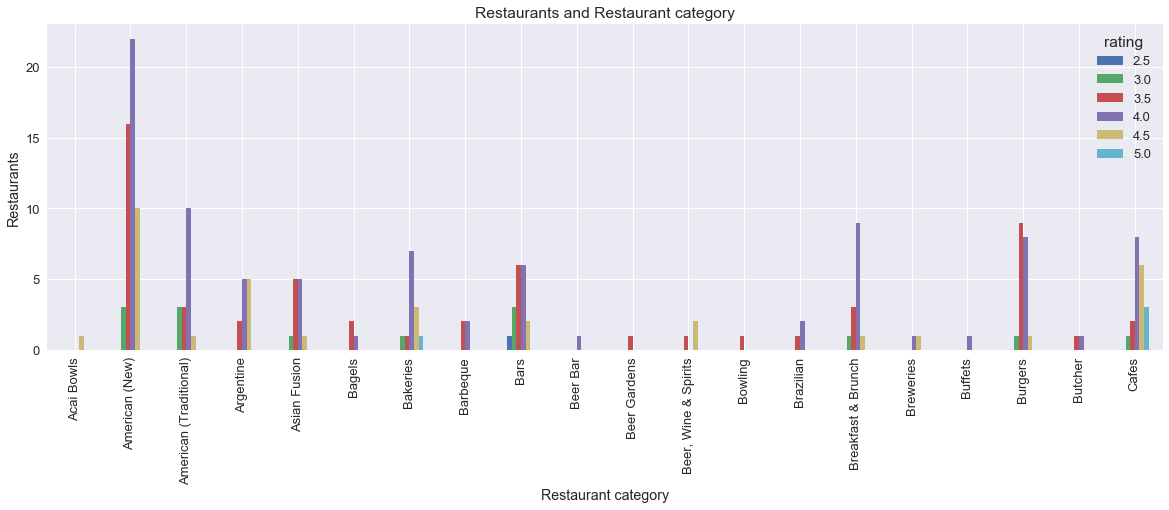

In [14]:
yelp = yelp.sort_values('rating', ascending=False)

sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(20,6))
pd.crosstab(yelp.category,yelp.rating).head(20).plot(ax=ax, kind='bar')
plt.title('Restaurants and Restaurant category')
plt.xlabel('Restaurant category')
plt.ylabel('Restaurants')
plt.show()

## Trip Advisor

In [15]:
# There are in total 3600 restaurants
ta.ranking.str[-5:].unique()

array(['3,600', nan], dtype=object)

### Converting the restaurant ranking to rating

In [16]:
# Extracting the ranking for each restaurant

ta['rating'] = ta.ranking.str.split(' ').str[0].str.replace(',','')

In [17]:
# Dividing the restaurants on a scale of 3,600 total restaurants in Miami

ta['rating'] = ta['rating'].astype(float)/3600

In [18]:
# Converting to a 5-scale

ta['ratingpercentile'] = pd.qcut(ta.rating,100, labels=False)

In [19]:
ta['ratingbucket'] = np.where(ta.rating.isnull(), np.nan, 5.0)
ta['ratingbucket'][ta['ratingpercentile'] > 10] = 4.5
ta['ratingbucket'][ta['ratingpercentile'] > 30] = 4.0
ta['ratingbucket'][ta['ratingpercentile'] > 50] = 3.5
ta['ratingbucket'][ta['ratingpercentile'] > 70] = 3.0
ta['ratingbucket'][ta['ratingpercentile'] > 85] = 2.5

C:\Users\devdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\devdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\devdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\devdi\Anaconda3\lib\

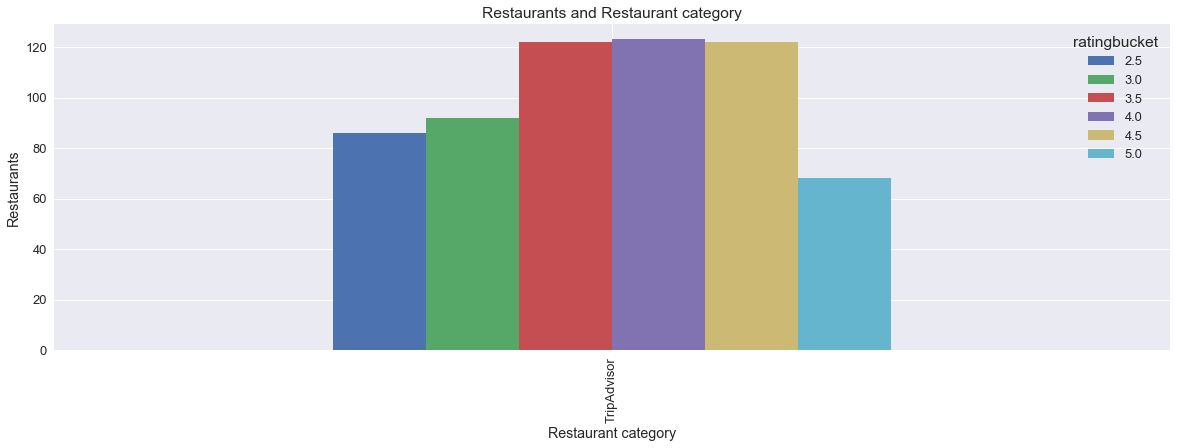

In [20]:
ta = ta.sort_values('rating', ascending=False)

sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(20,6))
pd.crosstab(ta.source,ta.ratingbucket).plot(ax=ax, kind='bar')
plt.title('Restaurants and Restaurant category')
plt.xlabel('Restaurant category')
plt.ylabel('Restaurants')
plt.show()

In [23]:
zomato.columns = ['zomato_Address', 'zomato_rating', 'zomato_Rating Text', 'name', 'zomato_Url', 'zomato_Votes',
       'zomato_Source','zomato_ratingbucket']

In [24]:
yelp.columns = ['yelp_category', 'name', 'yelp_price', 'yelp_rating', 'yelp_review_count', 'yelp_url', 'yelp_zip']

In [25]:
ta.columns = ['ta_restaurantID', 'ta_restaurantURL', 'name', 'ta_address', 'ta_ranking',
       'ta_total review', 'ta_source', 'ta_rating', 'ta_ratingpercentile', 'ta_ratingbucket']

In [26]:
comb = pd.merge(ta, zomato, how = 'inner', on = 'name')

comb.shape

(4, 17)

In [27]:
comb2 = pd.merge(comb, yelp, how = 'inner', on = 'name')

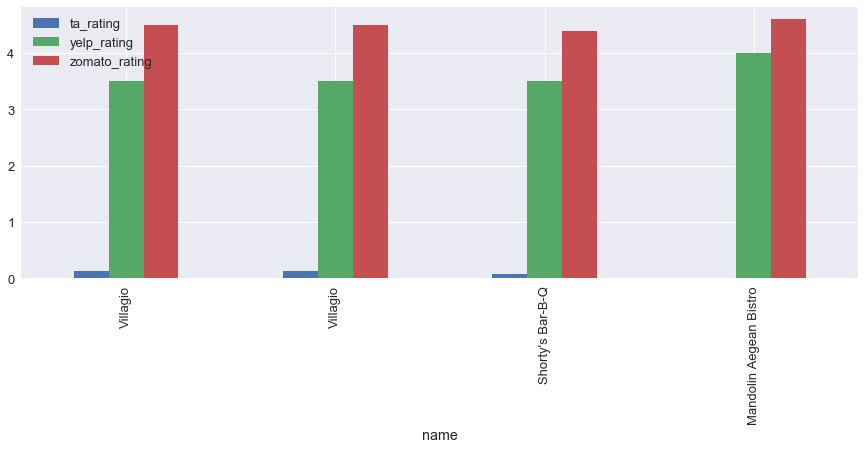

In [31]:
sns.set(font_scale=1.3)

comb2.plot(kind='bar', x = 'name',y = ['ta_rating','yelp_rating','zomato_rating'], figsize=(15,5))

plt.show()

In [29]:
comb3 = pd.merge(zomato, yelp, how = 'inner', on = 'name')

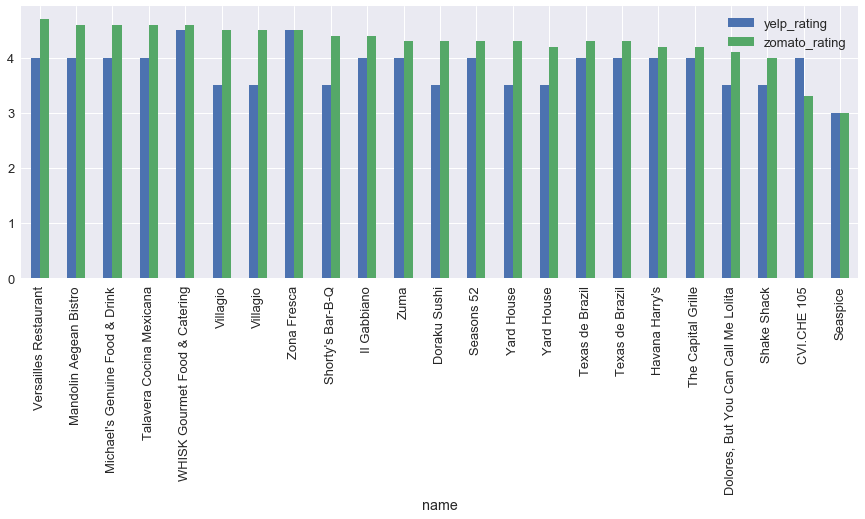

In [30]:
sns.set(font_scale=1.3)

comb3.plot(kind='bar', x = 'name',y = ['yelp_rating','zomato_rating'], figsize=(15,5))

plt.show()